# 1: Installation and Setup

In [ ]:
# Installing Tensorflow
! pip install -q tensorflow-gpu

     |████████████████████████████████| 489.6 MB 20 kB/s 


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 2: Data Preprocessing

In [ ]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [ ]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
class_name = ['0:airplane', '1: automobile' , '2: bird' ,'3:cat', '4:deer', '5:dog',
             '6:frog', '7:horse' ,'8: ship ', '9:truck']

In [ ]:
print(class_name)

['0:airplane', '1: automobile', '2: bird', '3:cat', '4:deer', '5:dog', '6:frog', '7:horse', '8: ship ', '9:truck']


In [ ]:
# Noramlizing the images
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [ ]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

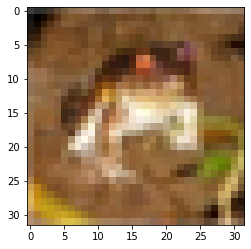

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_name

['0:airplane',
 '1: automobile',
 '2: bird',
 '3:cat',
 '4:deer',
 '5:dog',
 '6:frog',
 '7:horse',
 '8: ship ',
 '9:truck']

# 3: Building the CNN

In [ ]:
# Defining the object
model = tf.keras.models.Sequential()

In [ ]:
#Adding first CCN layer
# 1) filters(kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32,3)
model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size = 3,padding= 'same', activation = 'relu', input_shape = [32, 32,3] ))

In [ ]:
#Adding first CCN layer
# 1) filters(kernel) = 32
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters= 32, kernel_size = 3,padding= 'same', activation = 'relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D( pool_size = 2, strides=2 , padding='valid'))

In [ ]:
# Adding third CNN layer
# 1) filters(kernel) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU

model.add(tf.keras.layers.Conv2D(filters= 644, kernel_size = 3,padding= 'same', activation = 'relu'))

# maxpool layer parameters
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid
model.add(tf.keras.layers.MaxPool2D( pool_size = 2, strides=2 , padding='valid'))

In [ ]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding the Flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# adding first dense layer
model.add(tf.keras.layers.Dense(units = 128 , activation = 'relu'))

In [ ]:
# Adding second dense layer(output layer)
model.add(tf.keras.layers.Dense(units = 10 , activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 644)       186116    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 644)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 644)         0

# 4: Training the model

In [ ]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 673s 134ms/step - loss: 1.2818 - sparse_categorical_accuracy: 0.5429
Epoch 2/10
5000/5000 [==============================] - 676s 135ms/step - loss: 0.8791 - sparse_categorical_accuracy: 0.6921
Epoch 3/10
5000/5000 [==============================] - 723s 145ms/step - loss: 0.7402 - sparse_categorical_accuracy: 0.7403
Epoch 4/10
5000/5000 [==============================] - 673s 135ms/step - loss: 0.6382 - sparse_categorical_accuracy: 0.7759
Epoch 5/10
5000/5000 [==============================] - 671s 134ms/step - loss: 0.5600 - sparse_categorical_accuracy: 0.8048
Epoch 6/10
5000/5000 [==============================] - 675s 135ms/step - loss: 0.4918 - sparse_categorical_accuracy: 0.8256
Epoch 7/10
5000/5000 [==============================] - 707s 141ms/step - loss: 0.4359 - sparse_categorical_accuracy: 0.8452
Epoch 8/10
5000/5000 [==============================] - 657s 131ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8617


# 5: Model evaluation and prediction

In [ ]:
# evaluate the model performance
test_loss, test_acc = model.evaluate(x_test, y_test)

In [ ]:
print('Test Accuracy is: {}'.format(test_acc))

Test Accuracy is: 0.7401000261306763


In [ ]:
# Predictions 
y_pred = model.predict_classes(x_test)

In [ ]:
print(y_pred[0]), print(y_test[0])

In [ ]:
# Confusion matrix

from sklearn.metrics import Confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [ ]:
acc_cm = accuracy_score(y_test, y_pred)